<a href="https://colab.research.google.com/github/bohu615/NCD-FMCA/blob/main/Copy_of_MCA_CODES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random

import numpy as np
import matplotlib.pyplot as plt

import csv
from sklearn import svm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from sklearn.linear_model import LinearRegression

import sklearn
from sklearn import datasets

#### CODES BELOW ARE FOR TESTING DISCRETE-STATE MARKOV CHAIN

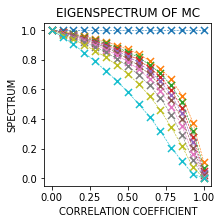

In [ ]:
#### CODES BLOW ARE THE EIGENSPECTRUM ####

np.random.seed(5)

num_state = 10

SAMPLE_X_LIST = []
SAMPLE_Y_LIST = []
EIGEN_LIST = []

for j in range(0, 100):
  for k in np.linspace(0, 1, 15):
    transition_matrix = np.array([[random.uniform(0, k/num_state) for i in range(num_state)] for j in range(num_state)])
    for j, r in enumerate(transition_matrix):
        r[j] += 1*(1-k) + (j/10)*(1-k)*10
    transition_matrix = transition_matrix/transition_matrix.sum(1).reshape(-1, 1)

    py_x = np.array(transition_matrix)
    p_x = np.array([1/num_state]*num_state)
    # p_x = np.exp(np.linspace(0, 3, 10))
    p_x = p_x/p_x.sum(0)
    p_y = (p_x.reshape(-1, 1)*transition_matrix).sum(0)
    pxy = p_x.reshape(-1, 1)*py_x

    px_y = (pxy/p_y.reshape(1, -1)).T
    px_x = pxy@px_y
    pxx = p_x.reshape(-1, 1)*p_x.reshape(1, -1)

    psd_kernel = px_x/pxx**(1/2)

    true_eigv, true_eigvec = np.linalg.eig(psd_kernel)
    index_sort = true_eigv.argsort()[::-1]
    true_eigv = true_eigv[index_sort]
    true_eigvec = true_eigvec[:, index_sort]

    # plt.imshow(psd_kernel)
    # plt.axis('off')
    # plt.show()

    true_ratio = px_x/pxx
    true_function = true_eigvec*p_x.reshape(-1, 1)**(1/2)

    # plt.imshow(true_function)
    # plt.axis('off')
    # plt.show()

    #generate_data

    data = np.random.choice(np.arange(0, pxy.reshape(-1).shape[0]), size=(1), p=pxy.reshape(-1))

    index_list = []

    for i in range(0, num_state):
        for j in range(0, num_state):
            index_list.append((i, j))

    data = np.array(index_list)[data]
    X = data[:, 0]
    Y = data[:, 1]

    SAMPLE_X = torch.nn.functional.one_hot(torch.from_numpy(X).view(-1).to(torch.int64), num_classes=num_state).float().view(X.shape[0], -1)
    SAMPLE_Y = torch.nn.functional.one_hot(torch.from_numpy(Y).view(-1).to(torch.int64), num_classes=num_state).float().view(Y.shape[0], -1)

    SAMPLE_X_LIST.append(SAMPLE_X)
    SAMPLE_Y_LIST.append(SAMPLE_Y)
    EIGEN_LIST.append(true_eigv)

    # plt.imshow(transition_matrix)
    # plt.show()

mean_eig = np.array(EIGEN_LIST).reshape(-1, 15, 10).mean(0)

plt.figure(figsize=(3, 3))

for k in range(0, 10, 1):
  plt.scatter(np.linspace(0, 1, 15), mean_eig[:, k], marker='x', s=50)
  plt.plot(np.linspace(0, 1, 15), mean_eig[:, k], linewidth=0.6, linestyle='--')
plt.title('EIGENSPECTRUM OF MC')
plt.xlabel('CORRELATION COEFFICIENT')
plt.ylabel('SPECTRUM')
plt.show()

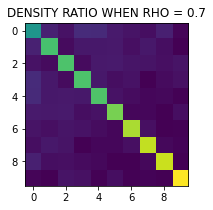

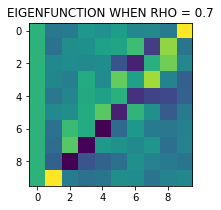

In [ ]:
#### CODES BLOW ARE THE EIGENFUNCTION AND DENSITY RATIO ####

num_state = 10

SAMPLE_X_LIST = []
SAMPLE_Y_LIST = []
EIGEN_LIST = []

for k in [0.7]:
  transition_matrix = np.array([[random.uniform(0, k/num_state) for i in range(num_state)] for j in range(num_state)])
  for j, r in enumerate(transition_matrix):
      r[j] += 1*(1-k) + (j/10)*(1-k)*10
  transition_matrix = transition_matrix/transition_matrix.sum(1).reshape(-1, 1)

  py_x = np.array(transition_matrix)
  p_x = np.array([1/num_state]*num_state)
  # p_x = np.exp(np.linspace(0, 3, 10))
  p_x = p_x/p_x.sum(0)
  p_y = (p_x.reshape(-1, 1)*transition_matrix).sum(0)
  pxy = p_x.reshape(-1, 1)*py_x

  px_y = (pxy/p_y.reshape(1, -1)).T
  px_x = pxy@px_y
  pxx = p_x.reshape(-1, 1)*p_x.reshape(1, -1)

  psd_kernel = px_x/pxx**(1/2)

  true_eigv, true_eigvec = np.linalg.eig(psd_kernel)
  index_sort = true_eigv.argsort()[::-1]
  true_eigv = true_eigv[index_sort]
  true_eigvec = true_eigvec[:, index_sort]

  # plt.imshow(psd_kernel)
  # plt.axis('off')
  # plt.show()

  true_ratio = px_x/pxx
  true_function = true_eigvec*p_x.reshape(-1, 1)**(1/2)

  # plt.imshow(true_function)
  # plt.axis('off')
  # plt.show()

  #generate_data

  data = np.random.choice(np.arange(0, pxy.reshape(-1).shape[0]), size=(100000), p=pxy.reshape(-1))

  index_list = []

  for i in range(0, num_state):
      for j in range(0, num_state):
          index_list.append((i, j))

  data = np.array(index_list)[data]
  X = data[:, 0]
  Y = data[:, 1]

  SAMPLE_X = torch.nn.functional.one_hot(torch.from_numpy(X).view(-1).to(torch.int64), num_classes=num_state).float().view(X.shape[0], -1)
  SAMPLE_Y = torch.nn.functional.one_hot(torch.from_numpy(Y).view(-1).to(torch.int64), num_classes=num_state).float().view(Y.shape[0], -1)

  SAMPLE_X_LIST.append(SAMPLE_X)
  SAMPLE_Y_LIST.append(SAMPLE_Y)
  EIGEN_LIST.append(true_eigv)

true_ratio = px_x
true_function = true_eigvec*p_x.reshape(-1, 1)**(1/2)

plt.figure(figsize=(3, 3))
plt.title('DENSITY RATIO WHEN RHO = 0.7')
plt.imshow(true_ratio)
plt.show()

plt.figure(figsize=(3, 3))
plt.title('EIGENFUNCTION WHEN RHO = 0.7')
plt.imshow(true_function)
plt.show()

In [ ]:
##### GENERATE DATA

#generate_data

data = np.random.choice(np.arange(0, pxy.reshape(-1).shape[0]), size=(100000), p=pxy.reshape(-1))

index_list = []

for i in range(0, num_state):
    for j in range(0, num_state):
        index_list.append((i, j))

data = np.array(index_list)[data]
X = data[:, 0]
Y = data[:, 1]

SAMPLE_X = torch.nn.functional.one_hot(torch.from_numpy(X).view(-1).to(torch.int64), num_classes=num_state).float().view(X.shape[0], -1)
SAMPLE_Y = torch.nn.functional.one_hot(torch.from_numpy(Y).view(-1).to(torch.int64), num_classes=num_state).float().view(Y.shape[0], -1)

#### DEFINING NEURAL NETWORKS

class NETWORK_F_MLP(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 200, out_dim = 200, how_many_layers = 2):
        super(NETWORK_F_MLP, self).__init__()
        self.dim = out_dim
        self.many_layer = how_many_layers

        self.fc_list = []
        self.bn_list = []

        self.fc_list.append(nn.Linear(input_dim+20, HIDDEN, bias=True))
        self.bn_list.append(nn.BatchNorm1d(HIDDEN))

        for i in range(0, self.many_layer-1):
            self.fc_list.append(nn.Linear(HIDDEN, HIDDEN, bias=True))
            self.bn_list.append(nn.BatchNorm1d(HIDDEN))

        self.fc_list = nn.ModuleList(self.fc_list)
        self.bn_list = nn.ModuleList(self.bn_list)

        self.fc_final = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):

        same_noise = torch.zeros((x.shape[0], 20)).uniform_().cuda()
        x = torch.cat((x, same_noise), 1)

        for i in range(0, self.many_layer):
            x = self.fc_list[i](x)
            x = torch.relu(x)
            x = self.bn_list[i](x)

        x = torch.sigmoid((self.fc_final(x)))
        return x

#### ADAPTIVE FILTERS

def adaptive_estimation(v_t, beta, square_term, i):
    v_t = beta*v_t + (1-beta)*square_term.detach()
    return v_t, (v_t/(1-beta**i))

def produce_CC_GRAD_ALL_new(cat_vector, track_cov, i, threshold):
#     XY = cat_vector.T@cat_vector/cat_vector.shape[0] - cat_vector.mean(0).unsqueeze(1)@cat_vector.mean(0).unsqueeze(0)
    XY = cat_vector.T@cat_vector/cat_vector.shape[0]
    cov = XY + torch.eye((XY.shape[0])).cuda()*(threshold)
#     cov = XY

    track_cov, cov_estimate = adaptive_estimation(track_cov, beta_track, cov, i)
    return cov_estimate, cov, track_cov

#### OTHER USEFUL FUNCTIONS

def check_if_eigenvectors(BIDIRECTIONAL, eigenvector, eigenvalue):
    error = ((BIDIRECTIONAL@eigenvector - eigenvalue.reshape(1, -1)*eigenvector)**2).mean()
    return error

from scipy.linalg import fractional_matrix_power

def frac(normalize):
     return fractional_matrix_power(normalize, -0.5)

def print_f_error():
    pick_eigen_X = torch.nn.functional.one_hot(torch.from_numpy(np.arange(0, 10)).view(-1).to(torch.int64), num_classes=10).float()
    output_f = NET_F(pick_eigen_X.cuda()).detach().cpu().numpy()
    normalized_f = output_f - output_f.mean(0)
    normalized_f = normalized_f@normalize_fmp[:units_f, :units_f]
#     normalized_f = normalized_f.reshape(10, 10, 10).mean(1)

    grad_matrix = grad[:units_f, units_f:]@grad[:units_f, units_f:].T

    # grad_matrix = np.linalg.inv(grad_matrix)
    eig = np.abs(np.linalg.eig(grad_matrix)[0])
    eig_vec = np.linalg.eig(grad_matrix)[1]

    constructed_value = eig
    constructed_vector = (eig_vec.T@normalized_f.T).T

    # plt.imshow((eig_vec.T@normalized_f.T).T, aspect='auto')
    # plt.show()

    error = check_if_eigenvectors(BIDIRECTIONAL, constructed_vector[:, 1:], constructed_value[1:])
    return error

from scipy.linalg import fractional_matrix_power

def PP_eigenvalue_eigenvecor(cov_estimate):
    save_cov_1 = np.copy(cov_estimate.detach().cpu().numpy())
    normalize = np.zeros((save_cov_1.shape))

    cov_1 = save_cov_1[:units_f, :units_f]
    cov_2 = save_cov_1[units_f:, units_f:]

    normalize[:units_f, :units_f] = (cov_1)
    normalize[units_f:, units_f:] = (cov_2)

    normalize_fmp = fractional_matrix_power(normalize, -0.5)
    grad = normalize_fmp@save_cov_1@normalize_fmp

    grad_matrix = grad[:units_f, units_f:]@grad[:units_f, units_f:].T

    eig = np.abs(np.linalg.eig(grad_matrix)[0])
    eig_vec = np.linalg.eig(grad_matrix)[1]

    index_sort = eig.argsort()[::-1]
    eig = eig[index_sort]
    eig_vec = eig_vec[:, index_sort]

    return eig, eig_vec, normalize_fmp

def PP_eigenvalue_eigenvecor_gpu(cov_estimate):

    E1,V1 = torch.linalg.eigh(cov_estimate[:units_f, :units_f])
    E2,V2 = torch.linalg.eigh(cov_estimate[units_f:, units_f:])

    normalize_fmp = torch.zeros((cov_estimate.shape)).cuda()
    normalize_fmp[:units_f, :units_f] = V1@torch.diag(E1**(-1/2))@V1.T
    normalize_fmp[units_f:, units_f:] = V2@torch.diag(E2**(-1/2))@V2.T
    grad = normalize_fmp@cov_estimate@normalize_fmp

    grad_matrix = grad[:units_f, units_f:]@grad[:units_f, units_f:].T

    eig, eig_vec = torch.linalg.eigh(grad_matrix)

    index_sort = eig.argsort(descending=True)
    eig = eig[index_sort]
    eig_vec = eig_vec[:, index_sort]

    return eig, eig_vec, normalize_fmp

def PP_generate_quantities_gpu(cov_estimate):

    E1,V1 = torch.linalg.eigh(cov_estimate[:units_f, :units_f])
    E2,V2 = torch.linalg.eigh(cov_estimate[units_f:, units_f:])

    RF_NORM = V1@torch.diag(E1**(-1/2))@V1.T
    RG_NORM = V2@torch.diag(E2**(-1/2))@V2.T

    P = cov_estimate[:units_f, units_f:]
    P_STAR = RF_NORM@P@RG_NORM

    PP_F = P_STAR@P_STAR.T
    eig_PF, eig_vec_PF = torch.linalg.eigh(PP_F)

    PP_G = P_STAR.T@P_STAR
    eig_PG, eig_vec_PG = torch.linalg.eigh(PP_G)

    index_sort = eig_PF.argsort(descending=True)
    eig_PF = eig_PF[index_sort]
    eig_vec_PF = eig_vec_PF[:, index_sort]

    index_sort = eig_PG.argsort(descending=True)
    eig_PG = eig_PG[index_sort]
    eig_vec_PG = eig_vec_PG[:, index_sort]

    return RF_NORM, RG_NORM, P_STAR, eig_PF, eig_vec_PF, eig_PG, eig_vec_PG

### RUN EXPERIMENTS

def run_experiments(iteration = 35000):


    cov_estimate = cov_estimate_save[0]

    start_time = time.time()

    for i in range(1, iteration):
        b1 = np.random.choice(SAMPLE_X[::1].shape[0], bs)

        sampled_data = SAMPLE_X[b1, :].float().cuda()
        sampled_noise = SAMPLE_Y[b1, :].float().cuda()

        output_f = NET_F(sampled_data)
        output_g = NET_G(sampled_noise)

        cat_vector = torch.cat((output_f, output_g), 1)
        cov_estimate, cov, track_cov0[0] = produce_CC_GRAD_ALL_new(cat_vector, track_cov0[0], i, threshold)

        cov_estimate_save[0] = torch.clone(cov_estimate.cpu())

        cov_estimate_f = cov_estimate[:units_f, :units_f]
        cov_f = cov[:units_f, :units_f]

        cov_estimate_g = cov_estimate[units_f:, units_f:]
        cov_g = cov[units_f:, units_f:]

        LOSS = (torch.linalg.inv(cov_estimate)*cov).sum() - (torch.linalg.inv(cov_estimate_f)*cov_f).sum() - (torch.linalg.inv(cov_estimate_g)*cov_g).sum()
        (LOSS).backward()

        optimizer_g.step()
        optimizer_f.step()

        optimizer_g.zero_grad()
        optimizer_f.zero_grad()

        COST = torch.logdet(cov_estimate) - torch.logdet(cov_estimate_f) - torch.logdet(cov_estimate_g)
        save_curve.append(COST.item())

        eig, eig_vec, normalize_fmp = PP_eigenvalue_eigenvecor_gpu(cov_estimate)
        eig_list.append(eig.detach().cpu().numpy())

        if i%10000 == 0 or i==1:
            print('iteration:', i, 'cost:', COST.item(), 'running time:', np.round(time.time() - start_time, 2))

            plt.figure(figsize=(3, 3))
            plt.plot(eig_list)
            plt.title('Learning curves of eigenvalues')
            plt.show()

            start_time = time.time()

    NET_F.eval()
    NET_G.eval()
def calculate_general_ratio(input_f_inter):
    RF_NORM, RG_NORM, P_STAR, eig_PF, eig_vec_PF, PP_G, eig_vec_PG = PP_generate_quantities_gpu(cov_estimate)
    with torch.no_grad():
        BS = 100

        output_f_inter = torch.zeros((input_f_inter.shape[0], units_f)).cuda()
        for k in range(0, BS):
            output_f_inter = (NET_F(input_f_inter) + output_f_inter*k)/(k+1)

        normalized_f = output_f_inter@RF_NORM
        eigen_normalized_f= normalized_f@eig_vec_PF
        #eigen_normalized_f = eigen_normalized_f*torch.from_numpy(p_x.reshape(-1, 1)).cuda().float() # whether has density
        ratio_map = (eigen_normalized_f*eig_PF.reshape(1, -1))@eigen_normalized_f.T

    return eigen_normalized_f, eig_PF, ratio_map

def calculate_general_ratio_withcov(input_f_inter, cov_estimate):
    RF_NORM, RG_NORM, P_STAR, eig_PF, eig_vec_PF, PP_G, eig_vec_PG = PP_generate_quantities_gpu(cov_estimate)
    with torch.no_grad():
        BS = 1

        output_f_inter = torch.zeros((input_f_inter.shape[0], units_f)).cuda()
        for k in range(0, BS):
            output_f_inter = (NET_F(input_f_inter) + output_f_inter*k)/(k+1)

        normalized_f = output_f_inter@RF_NORM
        eigen_normalized_f= normalized_f@eig_vec_PF
        #eigen_normalized_f = eigen_normalized_f*torch.from_numpy(p_x.reshape(-1, 1)).cuda().float() # whether has density
        ratio_map = (eigen_normalized_f*eig_PF.reshape(1, -1))@eigen_normalized_f.T

    return eigen_normalized_f, eig_PF, ratio_map

iteration: 1 cost: -5.2642974853515625 running time: 5.18


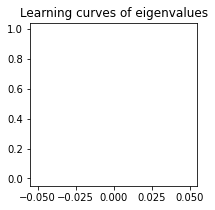

iteration: 10000 cost: -15.71832275390625 running time: 121.46


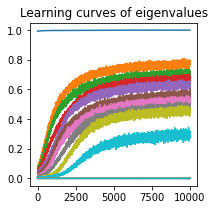

iteration: 20000 cost: -16.2833251953125 running time: 120.64


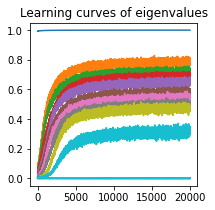

In [ ]:
##### RUN EXPERIMENTS FOR MC

import time

torch.cuda.set_device(0)

seed = 1
torch.manual_seed(seed)
np.random.seed(seed)

units_f = 20
units_g = 20
how_many_layers = 3

out_dim = 30

NET_F = NETWORK_F_MLP(input_dim = SAMPLE_Y.shape[1], HIDDEN = 300, out_dim = units_f, how_many_layers = how_many_layers).cuda()
NET_G = NETWORK_F_MLP(input_dim = SAMPLE_Y.shape[1], HIDDEN = 300, out_dim = units_g, how_many_layers = how_many_layers).cuda()

beta1 = 0.9
beta2 = 0.999

lr1 = 0.000001
lr2 = 0.000001

threshold = 1e-3

optimizer_f = optim.Adam([
      {'params': NET_F.parameters(), 'lr': lr2, 'betas': (beta1, beta2)},
   ], amsgrad = True)

optimizer_g = optim.Adam([
      {'params': NET_G.parameters(), 'lr': lr2, 'betas': (beta1, beta2)},
   ], amsgrad = True)

# TRAIN G DECODER

j = 0
bs = 3000

save_curve = []
eig_list = []
cov_estimate_save = [torch.zeros((units_f + units_g, units_f + units_g)).cuda()]
track_cov0 = [torch.zeros((units_f + units_g, units_f + units_g)).cuda()]

beta_track = 0.5

run_experiments(30000) ### PLEASE RUN THIS EXPERIMENT FOR 100000 ITERARTIONS!

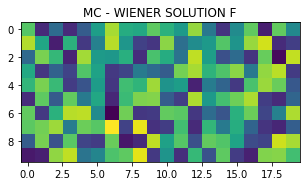

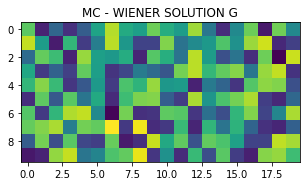

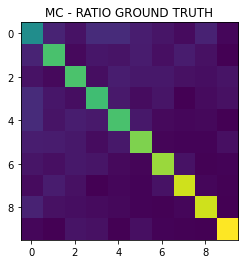

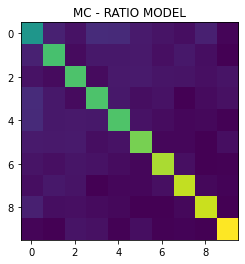

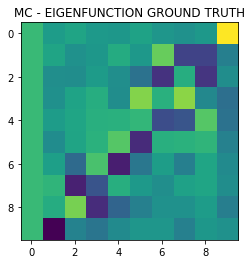

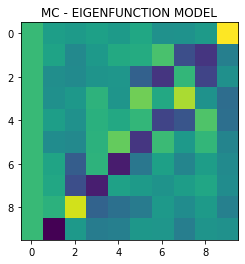

In [ ]:
#### VERIFYING WIENER SOLUTION ####

NET_F.eval()
NET_G.eval()

with torch.no_grad():

    b1 = np.random.choice(SAMPLE_X[::1].shape[0], 10000)

    sampled_data = SAMPLE_X[b1, :].float().cuda()
    sampled_noise = SAMPLE_Y[b1, :].float().cuda()

    output_f = NET_F(sampled_data)
    output_g = NET_G(sampled_noise)

    P = output_f.T@output_g/10000
    RF = output_f.T@output_f/10000
    RG = output_g.T@output_g/10000

    RF = fractional_matrix_power(RF.detach().cpu().numpy(), -0.5)
    RF = torch.from_numpy(RF).cuda().float()

    RG = fractional_matrix_power(RG.detach().cpu().numpy(), -0.5)
    RG = torch.from_numpy(RG).cuda().float()

    normalized_f = output_f@RF
    normalized_g = output_g@RG
    P = normalized_f.T@normalized_g/10000

    # VERIFY WIENER SOLUTION

    input_g_inter = torch.nn.functional.one_hot(torch.from_numpy(np.arange(0, num_state)).view(-1).to(torch.int64), num_classes=num_state).float().cuda()

    BS = 1000
    output_g_inter = torch.zeros((input_g_inter.shape[0], units_g)).cuda()
    for k in range(0, BS):
        output_g_inter = (NET_G(input_g_inter) + output_g_inter*k)/(k+1)

    normalized_g = output_g_inter
    normalized_g = normalized_g@RG

    save_f = torch.zeros((10, units_f)).cuda()
    for k in range(0, 10):
        labels = np.random.choice(np.arange(0, 10), size=(10000), p=px_y[k])
        input_x = torch.nn.functional.one_hot(torch.from_numpy(labels).view(-1).to(torch.int64), num_classes=num_state).float().cuda()
        output_g = NET_F(input_x)@RF
        save_f[k] = output_g.mean(0)

plt.figure(figsize=(5,5))
plt.imshow(save_f.detach().cpu())
# plt.axis('off')
plt.title('MC - WIENER SOLUTION F')
# plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

plt.figure(figsize=(5,5))
plt.title('MC - WIENER SOLUTION G')
plt.imshow((normalized_g@P.T).detach().cpu())
# plt.axis('off')
# plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

# NET_F.train()
# NET_G.train()

#### VERIFYING EIGENVECTOR AND DENSITY RATIO ####

cov_estimate = cov_estimate_save[0].cuda()
input_f_inter = torch.nn.functional.one_hot(torch.from_numpy(np.arange(0, num_state)).view(-1).to(torch.int64), num_classes=num_state).float().cuda()
eigen_normalized_f, eig_PF, ratio_map = calculate_general_ratio(input_f_inter)

plt.imshow(ratio_map.detach().cpu()*(pxx))
plt.title('MC - RATIO GROUND TRUTH')
plt.show()

plt.imshow(px_x)
plt.title('MC - RATIO MODEL')
plt.show()

show_function = eigen_normalized_f.detach().cpu()[:, :10]*p_x
show_function = show_function*np.sign(show_function[0]).reshape(1, -1)

true_function = true_eigvec*p_x**(1/2)
true_function = true_function*np.sign(true_function[0]).reshape(1, -1)

plt.imshow(show_function)
plt.title('MC - EIGENFUNCTION GROUND TRUTH')
plt.show()

plt.imshow(true_function)
plt.title('MC - EIGENFUNCTION MODEL')
plt.show()

#### CODES BELOW ARE FOR TESTING GAUSSIAN DISTRIBUTION

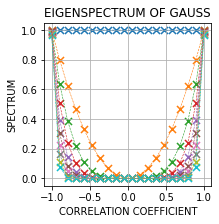

In [ ]:
# CONSTRUCT GROUND TRUTH

def return_gauss(x, m, v):
    return np.exp(-((x-m)**2)/(2*v))/(np.sqrt(2*np.pi*v))

# CONSTRUCT P(X)

x = np.linspace(-6, 6, 200)
p_x = return_gauss(x, 0, 1)

y = np.linspace(-6, 6, 200)

EIGEN_LIST = []

for k in np.linspace(-0.999, 0.999, 20):
    var = k**2
    mean_1 = var*y
    var_1 = (1-var)*(1+var)

    px_x_condition =  return_gauss(x.reshape(-1, 1), mean_1.reshape(1, -1), var_1)
    px_x = px_x_condition*p_x.reshape(1, -1)
    pxx = p_x.reshape(-1, 1)@p_x.reshape(1, -1)

    # plt.imshow(px_x)
    # plt.colorbar()
    # plt.show()

    psd_kernel = px_x/(pxx**(1/2)+1e-5)

#     psd_kernel = px_x_condition

    true_eigv, true_eigvec = np.linalg.eig(psd_kernel)
    index_sort = true_eigv.argsort()[::-1]
    true_eigv = true_eigv[index_sort]
    true_eigvec = true_eigvec[:, index_sort]

    EIGEN_LIST.append(true_eigv)

mean_eig = np.array(EIGEN_LIST)[:, :10]
mean_eig = mean_eig/mean_eig.max()
mean_eig = np.abs(mean_eig)

plt.figure(figsize=(3, 3))

for k in range(0, 10, 1):

  plt.scatter(np.linspace(-1, 1, 20), mean_eig[:, k], marker='x', s=50)
  plt.plot(np.linspace(-1, 1, 20), mean_eig[:, k], linewidth=0.6, linestyle='--')

plt.title('EIGENSPECTRUM OF GAUSS')
plt.xlabel('CORRELATION COEFFICIENT')
plt.ylabel('SPECTRUM')

plt.grid(b=None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# CONSTRUCT DATASET FROM GAUSSIAN

# CONSTRUCT P(X)

x = np.linspace(-6, 6, 2000)
p_x = return_gauss(x, 0, 1)

y = np.linspace(-6, 6, 2000)

np.random.seed(5)

num_state = 10

SAMPLE_X_LIST = []
SAMPLE_Y_LIST = []
EIGEN_LIST = []

for k in [0.9]:
    var = k**2
    mean_1 = var*y
    var_1 = (1-var)*(1+var)

    px_x_condition =  return_gauss(x.reshape(-1, 1), mean_1.reshape(1, -1), var_1)
    px_x = px_x_condition*p_x.reshape(1, -1)
    pxx = p_x.reshape(-1, 1)@p_x.reshape(1, -1)

    # plt.imshow(px_x)
    # plt.colorbar()
    # plt.show()

    psd_kernel = px_x/(pxx**(1/2)+1e-3)

#     psd_kernel = px_x_condition

    true_eigv, true_eigvec = np.linalg.eig(psd_kernel) ### COMPUTE THE GROUND TRUTH EIGENVALUE
    index_sort = true_eigv.argsort()[::-1]
    true_eigv = true_eigv[index_sort]
    true_eigvec = true_eigvec[:, index_sort]

    true_eigv = true_eigv/true_eigv.max()

    EIGEN_LIST.append(true_eigv)

# GAUSSIAN CASE

    rho = k

    mean_1 = 0
    sigma_1 = 1
    mean_2 = 0
    sigma_2 = 1

    mean = np.array((mean_1, mean_2))
    variance = np.array(((sigma_1**2, rho*sigma_1*sigma_2), (rho*sigma_1*sigma_2, sigma_2**2)))

    x, y = np.random.multivariate_normal(mean, variance, 1000000).T

    # plt.scatter(x, y, s=0.1)
    # plt.show()

    SAMPLE_X = torch.from_numpy(x).view(-1, 1)
    SAMPLE_Y = torch.from_numpy(y).view(-1, 1)

    SAMPLE_X_LIST.append(SAMPLE_X)
    SAMPLE_Y_LIST.append(SAMPLE_Y) #### ADD NEW DATASET

In [ ]:
def run_experiments(iteration = 40000):

    cov_estimate = cov_estimate_save[0]

    start_time = time.time()

    for i in range(1, iteration):
        b1 = np.random.choice(SAMPLE_X[::1].shape[0], bs)

        sampled_data = SAMPLE_X[b1, :].float().cuda()
        sampled_noise = SAMPLE_Y[b1, :].float().cuda()

        output_f = NET_F(sampled_data)
        output_g = NET_G(sampled_noise)

        cat_vector = torch.cat((output_f, output_g), 1)
        cov_estimate, cov, track_cov0[0] = produce_CC_GRAD_ALL_new(cat_vector, track_cov0[0], i, threshold)

        cov_estimate_save[0] = torch.clone(cov_estimate.cpu())

        cov_estimate_f = cov_estimate[:units_f, :units_f]
        cov_f = cov[:units_f, :units_f]

        cov_estimate_g = cov_estimate[units_f:, units_f:]
        cov_g = cov[units_f:, units_f:]

        LOSS = (torch.linalg.inv(cov_estimate)*cov).sum() - (torch.linalg.inv(cov_estimate_f)*cov_f).sum() - (torch.linalg.inv(cov_estimate_g)*cov_g).sum()
        (LOSS).backward()

        optimizer_g.step()
        optimizer_f.step()

        optimizer_g.zero_grad()
        optimizer_f.zero_grad()

        COST = torch.logdet(cov_estimate) - torch.logdet(cov_estimate_f) - torch.logdet(cov_estimate_g)
        save_curve.append(COST.item())

        eig, eig_vec, normalize_fmp = PP_eigenvalue_eigenvecor_gpu(cov_estimate)
        eig_list.append(eig.detach().cpu().numpy())

        if i%10000 == 0 or i==1:
            print('iteration:', i, 'cost:', COST.item(), 'running time:', np.round(time.time() - start_time, 2))

            plt.figure(figsize=(3, 3))
            plt.plot(eig_list)
            plt.title('Learning curves of eigenvalues')
            plt.show()

            start_time = time.time()

    NET_F.eval()
    NET_G.eval()

iteration: 1 cost: -5.483451843261719 running time: 0.03


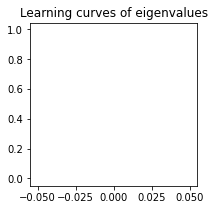

iteration: 10000 cost: -11.2657470703125 running time: 173.96


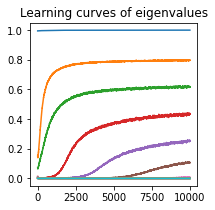

iteration: 20000 cost: -11.648628234863281 running time: 170.39


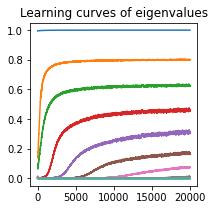

In [ ]:
import copy

training_curve_list = []
training_cov_list = []

for k in [0]:
  SAMPLE_X = SAMPLE_X_LIST[k]
  SAMPLE_Y = SAMPLE_Y_LIST[k]

  torch.cuda.set_device(0)

  seed = 1
  torch.manual_seed(seed)
  np.random.seed(seed)

  units_f = 20
  units_g = 20
  how_many_layers = 5

  out_dim = 30

  NET_F = NETWORK_F_MLP(input_dim = SAMPLE_Y.shape[1], HIDDEN = 300, out_dim = units_f, how_many_layers = how_many_layers).cuda()
  NET_G = NETWORK_F_MLP(input_dim = SAMPLE_Y.shape[1], HIDDEN = 300, out_dim = units_g, how_many_layers = how_many_layers).cuda()

  beta1 = 0.9
  beta2 = 0.999

  lr1 = 0.000001
  lr2 = 0.000001

  threshold = 1e-3
  beta_track = 0.9

  optimizer_f = optim.Adam([
        {'params': NET_F.parameters(), 'lr': lr2, 'betas': (beta1, beta2)},
    ], amsgrad = True)

  optimizer_g = optim.Adam([
        {'params': NET_G.parameters(), 'lr': lr2, 'betas': (beta1, beta2)},
    ], amsgrad = True)

  # TRAIN G DECODER

  j = 0
  bs = 5000

  save_curve = []
  eig_list = []
  cov_estimate_save = [torch.zeros((units_f + units_g, units_f + units_g)).cuda()]
  track_cov0 = [torch.zeros((units_f + units_g, units_f + units_g)).cuda()]

  run_experiments(30000) # PLEASE RUN MORE ITERARTIONS

  training_curve_list.append(copy.deepcopy(np.array(eig_list)))
  training_cov_list.append(cov_estimate_save[0].cpu())

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


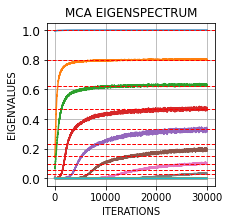

In [ ]:
to_plot = np.array(training_curve_list)[-1]
plt.figure(figsize=(3, 3))
plt.plot(to_plot)
for q in range(0, num_state):
    plt.axhline(EIGEN_LIST[0][q], color='r', linestyle='--', linewidth=1)

plt.grid(b=None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.title('MCA EIGENSPECTRUM')
plt.xlabel('ITERATIONS')
plt.ylabel('EIGENVALUES')
plt.show()

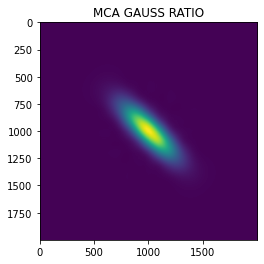

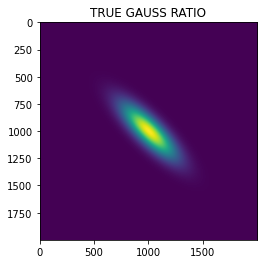

/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:957: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:957: ComplexWarning: Cas

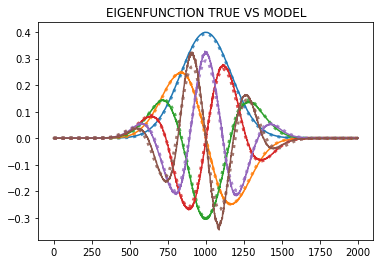

In [ ]:
x = np.linspace(-6, 6, 2000)
p_x = return_gauss(x, 0, 1).reshape(-1, 1)

y = np.linspace(-6, 6, 2000)

for k in [0.9]:
    var = k**2
    mean_1 = var*y
    var_1 = (1-var)*(1+var)

    px_x_condition =  return_gauss(x.reshape(-1, 1), mean_1.reshape(1, -1), var_1)
    px_x = px_x_condition*p_x.reshape(1, -1)
    pxx = p_x.reshape(-1, 1)@p_x.reshape(1, -1)

    # plt.imshow(px_x)
    # plt.colorbar()
    # plt.show()

    psd_kernel = px_x/(pxx**(1/2)+1e-3)

#     psd_kernel = px_x_condition

    true_eigv, true_eigvec = np.linalg.eig(psd_kernel)
    index_sort = true_eigv.argsort()[::-1]
    true_eigv = true_eigv[index_sort]
    true_eigvec = true_eigvec[:, index_sort]

    true_eigv = true_eigv/true_eigv.max()

    EIGEN_LIST.append(true_eigv)

NET_F.eval()
NET_G.eval()
cov_estimate = cov_estimate_save[0].cuda()
input_f_inter = torch.from_numpy(np.linspace(-6, 6, 2000)).float().cuda().reshape(-1, 1)
eigen_normalized_f, eig_PF, ratio_map = calculate_general_ratio(input_f_inter)

plt.imshow(ratio_map.detach().cpu()*(pxx))
plt.title('MCA GAUSS RATIO')
plt.show()

plt.imshow(px_x)
plt.title('TRUE GAUSS RATIO')
plt.show()

show_function = eigen_normalized_f.detach().cpu()[:, :10]*p_x
show_function = show_function*np.sign(show_function[0]).reshape(1, -1)

true_function = true_eigvec*p_x**(1/2)
true_function = true_function*np.sign(true_function[0]).reshape(1, -1)

# plt.plot(show_function)
# plt.axis('off')
# plt.show()

# plt.plot(true_function)
# plt.axis('off')
# plt.show()

scale_ = (np.abs(true_function[:, 1].max()/show_function[:, 1].max()))
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for k in range(0, 6):
  plt.plot(show_function[:, k], alpha=1, color=color_cycle[k])
  plt.plot(true_function[:, k]/scale_, linestyle='dotted', linewidth=3, alpha=0.8, color=color_cycle[k])
  # plt.scatter(true_function[:, k]/scale_, linestyle=':', linewidth=3, alpha=0.8, color=color_cycle[k])

plt.title('EIGENFUNCTION TRUE VS MODEL')
plt.show()

#### CODES BELOW ARE COMPARISONS WITH MINE

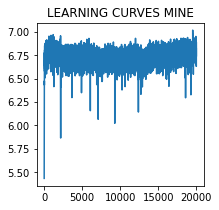

In [ ]:
### MINE

import numpy as np
import matplotlib.pyplot as plt

import csv

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from sklearn.linear_model import LinearRegression

import sklearn
from sklearn import datasets

DATA_LIST = [torch.cat((SAMPLE_X, SAMPLE_Y), 1)]

class NETWORK_F_MLP(nn.Module):
    def __init__(self, input_dim = 784, HIDDEN = 200, out_dim = 200, how_many_layers = 2):
        super(NETWORK_F_MLP, self).__init__()
        self.dim = out_dim
        self.many_layer = how_many_layers

        self.fc_list = []
        self.bn_list = []

        self.fc_list.append(nn.Linear(input_dim+20, HIDDEN, bias=True))
        self.bn_list.append(nn.BatchNorm1d(HIDDEN))

        for i in range(0, self.many_layer-1):
            self.fc_list.append(nn.Linear(HIDDEN, HIDDEN, bias=True))
            self.bn_list.append(nn.BatchNorm1d(HIDDEN))

        self.fc_list = nn.ModuleList(self.fc_list)
        self.bn_list = nn.ModuleList(self.bn_list)

        self.fc_final = nn.Linear(HIDDEN, out_dim, bias=True)

    def forward(self, x):

        same_noise = torch.zeros((x.shape[0], 20)).uniform_().cuda()
        x = torch.cat((x, same_noise), 1)

        for i in range(0, self.many_layer):
            x = self.fc_list[i](x)
            x = torch.relu(x)
            x = self.bn_list[i](x)

        x = ((self.fc_final(x)))
        return x

class NET(nn.Module):
    def __init__(self, N, HIDDEN, M):
        super(NET, self).__init__()
        self.fc1 = nn.Linear(N, HIDDEN, bias=True)
        self.fc2 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.fc4 = nn.Linear(HIDDEN, HIDDEN, bias=True)
        self.fc3 = nn.Linear(HIDDEN, M, bias=True)
        #self.fc3 = nn.Linear(N, M, bias=True)
        #self.fc4 = nn.Linear(1, 1, bias=True)

    def forward(self, x):
        x = (torch.relu((self.fc1(x))))
        x = (torch.relu((self.fc2(x))))
        x = (torch.relu((self.fc4(x))))
        x = torch.sum(torch.relu(((self.fc3(x)))), 1)
        #x = self.fc4(torch.mean(torch.sigmoid(((self.fc3(x)))), 1).view(-1, 1))
        return x

class BWM(nn.Module):
    def __init__(self, N, M):
        super(BWM, self).__init__()
        self.fc3 = nn.Linear(N, M, bias=True)

    def forward(self, x):
        x = torch.mean(torch.sigmoid(((self.fc3(x)))), 1)
        return x

def GD(net, lr):
    for param in net.parameters():
        if param.requires_grad:
            param.data = param.data - lr*param.grad

    net.zero_grad()
    return 0

def sample_uniform_data(min=-5, max=5, batch=300):
    return np.random.uniform(min, max, batch)

#### SAMPLE EFFICIENCY

MI_LIST = []
investigate_SAMPLE_EFFICIENCY = []

for k in [0]:

    MI_LIST = []

    dim = 1
    np.random.seed(4)

    samples = DATA_LIST[k]
    x_1 = samples[:, :dim]
    x_3 = samples[:, dim:]

    x = np.concatenate((x_1, x_3), 1)

    ### NORMALIZATION
    #x = x-x.min(0)
    #x = x/x.max(0)

    #plt.scatter(x_1, x_3)
    #plt.show()

    torch.manual_seed(1)
    np.random.seed(1)

    #max = np.max(x)
    #min = np.min(x)

    # max = 1
    # min = 0

    net = NET(x.shape[1], 256, 256).cuda()
#     net = NETWORK_F_MLP(input_dim = x.shape[1], HIDDEN = 300, out_dim = 1, how_many_layers = 3).cuda()
    #net = BWM(x.shape[1]*2, 500).cuda()

    optimizer = optim.Adam([
                {'params': net.parameters(), 'lr': 0.0001, 'betas': (0.9, 0.999)},
            ])

    beta_1 = 0.999
    beta_2 = 0.9

    m_t = 0
    v_t = 0

    bs = 1000

    for i in range(1, 20000):

        b1 = np.random.choice(x.shape[0], bs)
        b2 = np.random.choice(x.shape[0], bs)
        b3 = np.random.choice(x.shape[0], bs)

        joint_ = torch.from_numpy(x[b1, :]).float().cuda()
        disjoint_ = torch.from_numpy(np.concatenate((x[b2, 0:dim], x[b3, dim:]), 1)).float().cuda()

        # input_1 = torch.cat((joint_, disjoint_), 1)
        # input_2 = torch.cat((disjoint_, joint_), 1)

        # # input = torch.cat((joint_, disjoint_), 1)

        # # uniform_samples = sample_uniform_data(min, max, bs*dim*4).reshape(-1, dim*4)
        # # uniform_samples = torch.from_numpy(uniform_samples).float().cuda()

        # b4 = np.random.choice(x.shape[0], bs)
        # b5 = np.random.choice(x.shape[0], bs)
        # b6 = np.random.choice(x.shape[0], bs)
        # b7 = np.random.choice(x.shape[0], bs)

        # uniform_samples = torch.from_numpy(np.concatenate((x[b4, 0:dim], x[b5, dim:], x[b6, 0:dim], x[b7, dim:]), 1)).float().cuda()

        # get normal output
        output_joint = net(joint_)
        output_uniform = net(disjoint_)

        m_t = beta_1*m_t + (1-beta_1)*torch.mean(output_joint.detach())
        joint_m = m_t/(1-beta_1**i)

#         v_t = beta_2*v_t + (1-beta_2)*torch.mean(output_uniform.detach()**2)
#         variance = v_t/(1-beta_2**i)
#         std = torch.sqrt(variance)

        v_t = beta_2*v_t + (1-beta_2)*torch.mean(torch.exp(output_uniform.detach()))
        variance = v_t/(1-beta_2**i)
#         std = torch.sqrt(variance)

        #corr_ = (torch.mean(output_joint)/(torch.mean(output_uniform**2)**(1/2)))
#         corr_ = torch.mean(output_joint) - torch.log(torch.mean(torch.exp(output_uniform)))
        corr_ = torch.mean(output_joint) -  (torch.mean(torch.exp(output_uniform)))/(variance+1e-3)
        (-corr_).backward()
        MI_LIST.append(corr_.item())

        #GD(net, 1)

        optimizer.step()
        optimizer.zero_grad()

    investigate_SAMPLE_EFFICIENCY.append(np.copy(MI_LIST))
    plt.figure(figsize=(3, 3))
    plt.plot(np.stack(investigate_SAMPLE_EFFICIENCY).T)
    plt.title('LEARNING CURVES MINE')
    plt.show()

    # print(dim, np.mean(MI_LIST[-3000:]), np.std(MI_LIST[-3000:]))

#### CODES BELOW ARE FOR CLASSIFICATION

In [ ]:
from torch.utils.data import Subset, Dataset
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
from torchvision.utils import save_image, make_grid

!pip install python-mnist

from sklearn.model_selection import train_test_split
from mnist import MNIST
import numpy as np

from torch.utils.data import Subset, Dataset
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
from torchvision.utils import save_image, make_grid

!pip install python-mnist

from sklearn.model_selection import train_test_split
from mnist import MNIST
import numpy as np

def from_dataset_to_numpy(trainset):

    shape_data = list(trainset[0][0].shape)
    shape_data.insert(0, len(trainset))

    train_data = torch.zeros(shape_data).float()
    train_label = torch.zeros((len(trainset), )).float()
    for i in range(len(trainset)):
      samples, current_class = trainset[i]
      train_label[i] = current_class
      train_data[i] = samples

    indeces = np.argsort(train_label)
    train_label = train_label[indeces]
    train_data = train_data[indeces]

    return train_data, train_label

def from_dataset_to_numpy(trainset):

    shape_data = list(trainset[0][0].shape)
    shape_data.insert(0, len(trainset))

    train_data = torch.zeros(shape_data).float()
    train_label = torch.zeros((len(trainset), )).float()
    for i in range(len(trainset)):
      samples, current_class = trainset[i]
      train_label[i] = current_class
      train_data[i] = samples

    indeces = np.argsort(train_label)
    train_label = train_label[indeces]
    train_data = train_data[indeces]

    return train_data, train_label

def generate_mnist():

  train_data, train_label = mndata.load_training()
  test_data, test_label = mndata.load_testing()

  train_data = np.array(train_data)
  test_data = np.array(test_data)

  train_label = np.array(train_label)
  test_label = np.array(test_label)

  train_data = train_data/255
  test_data = test_data/255

  argsort = np.argsort(train_label)
  train_label = np.take_along_axis(train_label, argsort, axis=0)
  train_data = np.take_along_axis(train_data, argsort.reshape(-1, 1), axis=0)

  argsort = np.argsort(test_label)
  test_label = np.take_along_axis(test_label, argsort, axis=0)
  test_data = np.take_along_axis(test_data, argsort.reshape(-1, 1), axis=0)

  train_data = torch.from_numpy(train_data).float()
  train_label = torch.from_numpy(train_label).float()

  return train_data, train_label

# GENERATE MNIST
# mndata = MNIST('./drive/MyDrive/mnist/MNIST/raw/') ### PLEASE DOWNLOAD MNIST DATASET
# mndata.gz = True
# train_data, train_label = generate_mnist()

# SAMPLE_X = torch.nn.functional.interpolate(train_data.view(-1, 1, 28, 28),size=(32,32), mode='bilinear').repeat(1, 3, 1, 1)
# SAMPLE_Y = torch.nn.functional.one_hot(train_label.view(-1).to(torch.int64), num_classes=10).float()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchvision

def generate_cifar():

  transform_train = transforms.Compose([
    transforms.ToTensor(),
  ])

  trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform_train)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=False, num_workers=0, drop_last=True)

  testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform_train)
  testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=0)

  train_data, train_label = from_dataset_to_numpy(trainset)

  SAMPLE_X = train_data
  SAMPLE_Y = torch.nn.functional.one_hot((train_label).view(-1).to(torch.int64))
  return SAMPLE_X, SAMPLE_Y

def generate_svhn():

  transform_train = transforms.Compose([
    transforms.ToTensor(),
  ])

  trainset = torchvision.datasets.SVHN(root='../data', split='train', download=True, transform=transform_train)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=False, num_workers=0, drop_last=True)

  testset = torchvision.datasets.SVHN(root='../data', split='test', download=True, transform=transform_train)
  testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=0)

  train_data, train_label = from_dataset_to_numpy(trainset)

  SAMPLE_X = train_data
  SAMPLE_Y = torch.nn.functional.one_hot((train_label).view(-1).to(torch.int64))
  return SAMPLE_X, SAMPLE_Y

def generate_cifar_100():

  transform_train = transforms.Compose([
    transforms.ToTensor(),
  ])

  trainset = torchvision.datasets.CIFAR100(root='../data', train=True, download=True, transform=transform_train)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=False, num_workers=0, drop_last=True)

  testset = torchvision.datasets.CIFAR100(root='../data', train=True, download=True, transform=transform_train)
  testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=0)

  train_data, train_label = from_dataset_to_numpy(trainset)

  SAMPLE_X = train_data
  SAMPLE_Y = torch.nn.functional.one_hot((train_label).view(-1).to(torch.int64))
  return SAMPLE_X, SAMPLE_Y

SAMPLE_X, SAMPLE_Y = generate_cifar()

Files already downloaded and verified
Files already downloaded and verified


iteration: 1 cost: -18.94281005859375 running time: 0.93


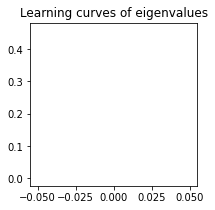

iteration: 100 cost: -3.989654541015625 running time: 92.73


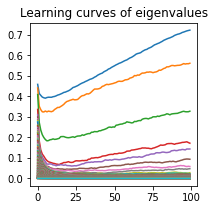

iteration: 200 cost: -6.172943115234375 running time: 94.07


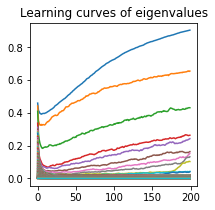

iteration: 300 cost: -8.45550537109375 running time: 94.03


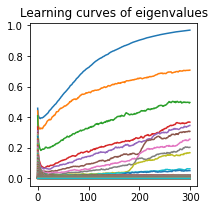

iteration: 400 cost: -10.265838623046875 running time: 93.49


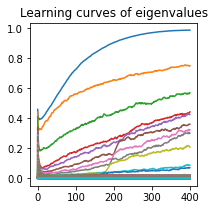

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=30):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(-1, 3, 32 ,32)

        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return torch.sigmoid(out)


def ResNet18(num_classes=30):
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes)


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

def run_experiments(iteration = 40000):

    cov_estimate = cov_estimate_save[0]

    start_time = time.time()

    for i in range(1, iteration):
        b1 = np.random.choice(SAMPLE_X[::1].shape[0], bs)

        sampled_data = SAMPLE_X[b1, :].float().cuda()
        sampled_noise = SAMPLE_Y[b1, :].float().cuda()

        output_f = NET_F(sampled_data)
        output_g = NET_G(sampled_noise)

        cat_vector = torch.cat((output_f, output_g), 1)
        cov_estimate, cov, track_cov0[0] = produce_CC_GRAD_ALL_new(cat_vector, track_cov0[0], i, threshold)

        cov_estimate_save[0] = torch.clone(cov_estimate.cpu())

        cov_estimate_f = cov_estimate[:units_f, :units_f]
        cov_f = cov[:units_f, :units_f]

        cov_estimate_g = cov_estimate[units_f:, units_f:]
        cov_g = cov[units_f:, units_f:]

        LOSS = (torch.linalg.inv(cov_estimate)*cov).sum() - (torch.linalg.inv(cov_estimate_f)*cov_f).sum() - (torch.linalg.inv(cov_estimate_g)*cov_g).sum()
        (LOSS).backward()

        optimizer_g.step()
        optimizer_f.step()

        optimizer_g.zero_grad()
        optimizer_f.zero_grad()

        COST = torch.logdet(cov_estimate) - torch.logdet(cov_estimate_f) - torch.logdet(cov_estimate_g)
        save_curve.append(COST.item())

        eig, eig_vec, normalize_fmp = PP_eigenvalue_eigenvecor_gpu(cov_estimate)
        eig_list.append(eig.detach().cpu().numpy())

        if i%100 == 0 or i==1:
            print('iteration:', i, 'cost:', COST.item(), 'running time:', np.round(time.time() - start_time, 2))

            plt.figure(figsize=(3, 3))
            plt.plot(eig_list)
            plt.title('Learning curves of eigenvalues')
            plt.show()

            start_time = time.time()

    NET_F.eval()
    NET_G.eval()


seed = 1
torch.manual_seed(seed)
np.random.seed(seed)

units_f = 200
units_g = 200
how_many_layers = 2

out_dim = 30

NET_F = ResNet18(units_f).cuda()
NET_G = NETWORK_F_MLP(input_dim = SAMPLE_Y.shape[1], HIDDEN = 1000, out_dim = units_g, how_many_layers = how_many_layers).cuda()

beta1 = 0.9
beta2 = 0.999

lr1 = 0.00001
lr2 = 0.00001

threshold = 1e-3
beta_track = 0.9

optimizer_f = optim.Adam([
    {'params': NET_F.parameters(), 'lr': lr2, 'betas': (beta1, beta2)},
], amsgrad = True)

optimizer_g = optim.Adam([
    {'params': NET_G.parameters(), 'lr': lr2, 'betas': (beta1, beta2)},
], amsgrad = True)

# TRAIN G DECODER

j = 0
bs = 1000

save_curve = []
eig_list = []
cov_estimate_save = [torch.zeros((units_f + units_g, units_f + units_g)).cuda()]
track_cov0 = [torch.zeros((units_f + units_g, units_f + units_g)).cuda()]

run_experiments(500) ### PLEASE RUN MORE EXEPRIMENTS TO HAVE A BETTER CONVERGENCE


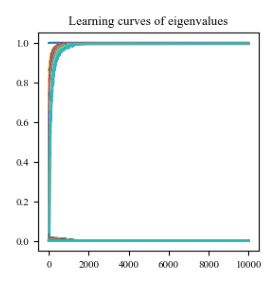

In [ ]:
# WHEN CONVERGING:
import urllib

from PIL import Image

plt.figure(figsize=(5, 5))
f = urllib.request.urlopen("https://i.imgur.com/xIcI9jp.png")

plt.imshow(plt.imread(f))
plt.axis('off')
plt.show()


#### FACTORIAL CODES EXPERIMENTS

In [ ]:
def run_experiments(iteration = 40000):

    cov_estimate = cov_estimate_save[0]

    start_time = time.time()

    for i in range(1, iteration):
        b1 = np.random.choice(SAMPLE_X[::1].shape[0], bs)

        sampled_data = SAMPLE_X[b1, :].float().cuda()
        sampled_noise = SAMPLE_Y[b1, :].float().cuda()

        output_f = NET_F(sampled_data)
        output_g = NET_G(sampled_noise)

        cat_vector = torch.cat((output_f, output_g), 1)
        cov_estimate, cov, track_cov0[0] = produce_CC_GRAD_ALL_new(cat_vector, track_cov0[0], i, threshold)

        cov_estimate_save[0] = torch.clone(cov_estimate.cpu())

        cov_estimate_f = cov_estimate[:units_f, :units_f]
        cov_f = cov[:units_f, :units_f]

        cov_estimate_g = cov_estimate[units_f:, units_f:]
        cov_g = cov[units_f:, units_f:]

        LOSS = (torch.linalg.inv(cov_estimate)*cov).sum() - (torch.linalg.inv(cov_estimate_f)*cov_f).sum() - (torch.linalg.inv(cov_estimate_g)*cov_g).sum()
        (LOSS).backward()

        optimizer_g.step()
        optimizer_f.step()

        optimizer_g.zero_grad()
        optimizer_f.zero_grad()

        COST = torch.logdet(cov_estimate) - torch.logdet(cov_estimate_f) - torch.logdet(cov_estimate_g)
        save_curve.append(COST.item())

        eig, eig_vec, normalize_fmp = PP_eigenvalue_eigenvecor_gpu(cov_estimate)
        eig_list.append(eig.detach().cpu().numpy())

        if i%100 == 0 or i==1:
            print('iteration:', i, 'cost:', COST.item(), 'running time:', np.round(time.time() - start_time, 2))

            plt.figure(figsize=(3, 3))
            plt.plot(eig_list)
            plt.title('Learning curves of eigenvalues')
            plt.show()

            start_time = time.time()

            eigen_normalized_f, eig_PF, ratio_map = calculate_general_ratio(SAMPLE_X[::100].cuda())

            plt.imshow(ratio_map.detach().cpu())
            plt.show()
            # map_eigenfunctions = (eigen_normalized_f.T.reshape(30, -1, 1)@eigen_normalized_f.T.reshape(30, 1, -1))

            # cifar10_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
            # mnist_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
            # x_ticks = np.arange(0, eigen_normalized_f.shape[0], int(eigen_normalized_f.shape[0]/10))+int(eigen_normalized_f.shape[0]/20)

            # for k in range(1, 5):
            #   plt.figure(figsize=(3, 3))
            #   plt.imshow(map_eigenfunctions[k].detach().cpu())
            #   plt.xticks(x_ticks, cifar10_classes, rotation=49, fontsize=8)
            #   plt.yticks(x_ticks, cifar10_classes, rotation='horizontal', fontsize=8)
            #   plt.show()

            # np.save('./drive/MyDrive/results_cifar10/map_eigenfunctions_mnist_iteration_{0}.npy'.format(i), map_eigenfunctions.detach().cpu().numpy())
            # np.save('./drive/MyDrive/results_cifar10/eig_list_mnist_iteration_{0}.npy'.format(i), eig_PF.detach().cpu().numpy())

    NET_F.eval()
    NET_G.eval()

In [ ]:
SAMPLE_X, SAMPLE_Y = generate_cifar()

# CONSTRUCT RANDOM NOISE

out_dim = 5000

discrete_noise = torch.randint(2, (SAMPLE_X.shape[0]*int(out_dim/2), 1)).float()
discrete_one_hot = torch.nn.functional.one_hot(discrete_noise.view(-1).to(torch.int64), num_classes=2).float().view(SAMPLE_X.shape[0], -1)
noise_prior = torch.clone(discrete_one_hot)
SAMPLE_Y = noise_prior

Files already downloaded and verified
Files already downloaded and verified


iteration: 1 cost: -0.5031204223632812 running time: 0.95


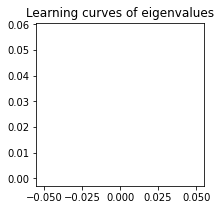

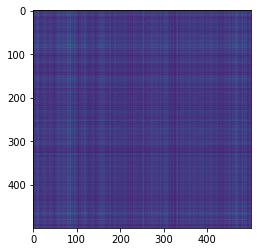

iteration: 100 cost: -0.329193115234375 running time: 106.73


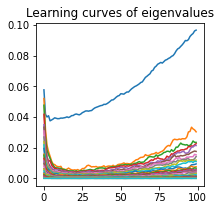

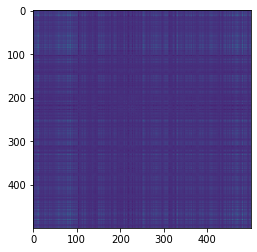

iteration: 200 cost: -1.7074813842773438 running time: 106.98


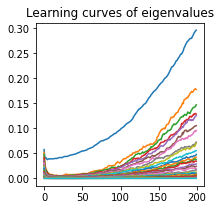

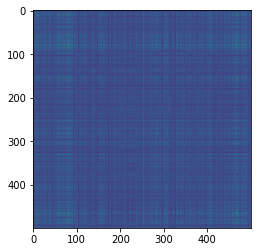

iteration: 300 cost: -4.715206146240234 running time: 106.6


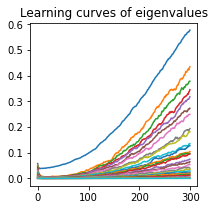

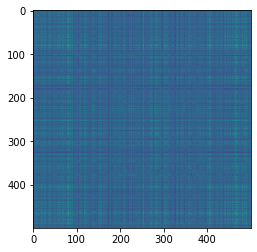

iteration: 400 cost: -8.636295318603516 running time: 106.97


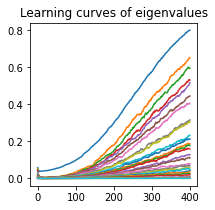

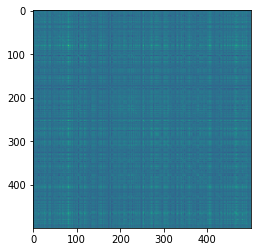

In [ ]:
import time

torch.cuda.set_device(0)

seed = 1
torch.manual_seed(seed)
np.random.seed(seed)

units_f = 30
units_g = 30
how_many_layers = 2

out_dim = 30

NET_F = ResNet18(units_f).cuda()
NET_G = NETWORK_F_MLP(input_dim = SAMPLE_Y.shape[1], HIDDEN = 1000, out_dim = units_g, how_many_layers = how_many_layers).cuda()

beta1 = 0.9
beta2 = 0.999

lr1 = 0.00001
lr2 = 0.00001

threshold = 1e-3
beta_track = 0.9

optimizer_f = optim.Adam([
    {'params': NET_F.parameters(), 'lr': lr2, 'betas': (beta1, beta2)},
], amsgrad = True)

optimizer_g = optim.Adam([
    {'params': NET_G.parameters(), 'lr': lr2, 'betas': (beta1, beta2)},
], amsgrad = True)

# TRAIN G DECODER

j = 0
bs = 1000

save_curve = []
eig_list = []
cov_estimate_save = [torch.zeros((units_f + units_g, units_f + units_g)).cuda()]
track_cov0 = [torch.zeros((units_f + units_g, units_f + units_g)).cuda()]

run_experiments(500) #### PLEASE RUN AT LEAST 30000 ITERATIONS TO OBTAIN A GOOD RESULT

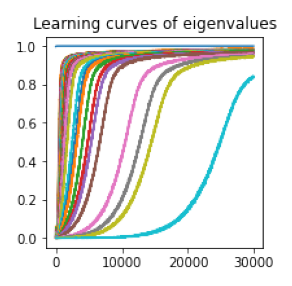

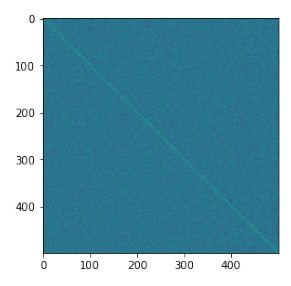

In [ ]:
# WHEN CONVERGING:

import urllib

from PIL import Image

plt.figure(figsize=(5, 5))
f = urllib.request.urlopen("https://i.imgur.com/Mt3Ou56.png")

plt.imshow(plt.imread(f))
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
f = urllib.request.urlopen("https://i.imgur.com/5gbrWek.png")

plt.imshow(plt.imread(f))
plt.axis('off')
plt.show()

